# UDACITY - Technical Preparations for Data Scientist
Project: Writing a Data Scientist Blog Post

Student name: Komsan Tangchitkhachon

Submitted date: 6 March 2022

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. the platform is accessible via website and mobile app. Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the activity of homestays in Seattle, WA which shared on 26 Jun 2018.

This data analysis of listings.csv, calendar.csv, and reviews.csv will be done to answer these questions;
1. When is the busiest?
2. Where is the busiest homestay in Seattle?
3. What impact do relate with the price of Airbnb's homestay at Seattle?

Seattle Airbnb Open Data shared the dataset which includes the homestay listing in Seattle. Data is collected from Jan 2016 to Jan 2017.
Please see the dataset as below

1. calendar.csv - including listing id and the price and availability for that day
2. listings.csv - including full descriptions and average review score
3. reviews.csv - including unique id for each reviewer and detailed comments

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
pd.options.mode.chained_assignment = None
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
url = 'https://github.com/komsantangchitBI/UdacityWriteApost/raw/main/calendar_rev.csv'
calendar = pd.read_csv(url)
calendar

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_id,date,available,price
0,241032.0,1/4/2016,t,$85.00
1,241032.0,1/5/2016,t,$85.00
2,241032.0,1/6/2016,f,NaN
3,241032.0,1/7/2016,f,NaN
4,241032.0,1/8/2016,f,NaN
5,241032.0,1/9/2016,f,NaN
6,241032.0,1/10/2016,f,NaN
7,241032.0,1/11/2016,f,NaN
8,241032.0,1/12/2016,f,NaN
9,241032.0,1/13/2016,t,$85.00


In [91]:
url2 = 'https://github.com/komsantangchitBI/UdacityWriteApost/raw/main/listings.csv'
listings = pd.read_csv(url2)
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [92]:
url3 = 'https://github.com/komsantangchitBI/UdacityWriteApost/raw/main/reviews_rev.csv'
reviews = pd.read_csv(url3)
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016.0,38917982.0,7/19/2015,28943674.0,Bianca,Cute and cozy place. Perfect location to every...
1,7202016.0,39087409.0,7/20/2015,32440555.0,Frank,Kelly has a great room in a very central locat...
2,7202016.0,39820030.0,7/26/2015,37722850.0,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016.0,40813543.0,8/2/2015,33671805.0,George,Close to Seattle Center and all it has to offe...
4,7202016.0,41986501.0,8/10/2015,34959538.0,Ming,Kelly was a great host and very accommodating ...
5,7202016.0,43979139.0,8/23/2015,1154501.0,Barent,"Kelly was great, place was great, just what I ..."
6,7202016.0,45265631.0,9/1/2015,37853266.0,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016.0,46749120.0,9/13/2015,24445447.0,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016.0,47783346.0,9/21/2015,249583.0,Todd,Kelly's place is conveniently located on a qui...
9,7202016.0,48388999.0,9/26/2015,38110731.0,Tatiana,"The place was really nice, clean, and the most..."


Look the data in general and type info

In [93]:
calendar.head()

,listing_id,date,available,price
0,241032.0,1/4/2016,t,$85.00
1,241032.0,1/5/2016,t,$85.00
2,241032.0,1/6/2016,f,NaN
3,241032.0,1/7/2016,f,NaN
4,241032.0,1/8/2016,f,NaN


In [94]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
listing_id    547135 non-null float64
date          547135 non-null object
available     547135 non-null object
price         365047 non-null object
dtypes: float64(1), object(3)
memory usage: 32.0+ MB


In [95]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [96]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [97]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016.0,38917982.0,7/19/2015,28943674.0,Bianca,Cute and cozy place. Perfect location to every...
1,7202016.0,39087409.0,7/20/2015,32440555.0,Frank,Kelly has a great room in a very central locat...
2,7202016.0,39820030.0,7/26/2015,37722850.0,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016.0,40813543.0,8/2/2015,33671805.0,George,Close to Seattle Center and all it has to offe...
4,7202016.0,41986501.0,8/10/2015,34959538.0,Ming,Kelly was a great host and very accommodating ...


In [98]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       43826 non-null float64
id               43826 non-null float64
date             43826 non-null object
reviewer_id      43826 non-null float64
reviewer_name    43826 non-null object
comments         43814 non-null object
dtypes: float64(3), object(3)
memory usage: 3.9+ MB


In [99]:
#pandas do not detect date as a date format. change the data type for 'date'
calendar['date'] = pd.to_datetime(calendar.date)
calendar
all_drop_calendar = calendar.dropna()
all_drop_calendar

,listing_id,date,available,price
0,241032.0,2016-01-04,t,$85.00
1,241032.0,2016-01-05,t,$85.00
9,241032.0,2016-01-13,t,$85.00
10,241032.0,2016-01-14,t,$85.00
14,241032.0,2016-01-18,t,$85.00
15,241032.0,2016-01-19,t,$85.00
16,241032.0,2016-01-20,t,$85.00
20,241032.0,2016-01-24,t,$85.00
21,241032.0,2016-01-25,t,$85.00
22,241032.0,2016-01-26,t,$85.00


In [100]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
listing_id    547135 non-null float64
date          547135 non-null datetime64[ns]
available     547135 non-null object
price         365047 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 32.0+ MB


change listing_id to string. change price into the float

In [101]:
calendar['listing_id'] = calendar['listing_id'].astype(str)

calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month_year'] = pd.to_datetime(calendar['date']).dt.to_period('M')

calendar['price'] = calendar['price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)

calendar.head()

,listing_id,date,available,price,month,year,month_year
0,241032.0,2016-01-04,t,85.0,1.0,2016.0,2016-01
1,241032.0,2016-01-05,t,85.0,1.0,2016.0,2016-01
2,241032.0,2016-01-06,f,NaN,1.0,2016.0,2016-01
3,241032.0,2016-01-07,f,NaN,1.0,2016.0,2016-01
4,241032.0,2016-01-08,f,NaN,1.0,2016.0,2016-01


In [102]:
relevant_features = ['price','accommodates','bathrooms','bedrooms','beds','weekly_price','monthly_price','cleaning_fee', 'instant_bookable','reviews_per_month','cancellation_policy']
q3 = listings[relevant_features]
q3.head()

,price,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,cleaning_fee,instant_bookable,reviews_per_month,cancellation_policy
0,$85.00,4,1.0,1.0,1.0,NaN,NaN,NaN,f,4.07,moderate
1,$150.00,4,1.0,1.0,1.0,"$1,000.00","$3,000.00",$40.00,f,1.48,strict
2,$975.00,11,4.5,5.0,7.0,NaN,NaN,$300.00,f,1.15,strict
3,$100.00,3,1.0,0.0,2.0,$650.00,"$2,300.00",NaN,f,NaN,flexible
4,$450.00,6,2.0,3.0,3.0,NaN,NaN,$125.00,f,0.89,strict


In [103]:
def clean_price(col):

    col = col.apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
    return col

In [118]:
q3.head()

,price,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,cleaning_fee,reviews_per_month,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict
0,85.0,4,1.0,1.0,1.0,788.481832,2613.33619,61.710904,4.070000,0,1,0
1,150.0,4,1.0,1.0,1.0,1000.000000,3000.00000,40.000000,1.480000,0,0,1
2,975.0,11,4.5,5.0,7.0,788.481832,2613.33619,300.000000,1.150000,0,0,1
3,100.0,3,1.0,0.0,2.0,650.000000,2300.00000,61.710904,2.078919,0,0,0
4,450.0,6,2.0,3.0,3.0,788.481832,2613.33619,125.000000,0.890000,0,0,1


1. When is the busiest?

In [107]:
check_f = calendar[(calendar['available'] == 'f') & (calendar['price'].notnull())].shape[0]
print('The number of rows where available = f and price is present is: {}  row(s)'.format(check_f))

The number of rows where available = f and price is present is: 0  row(s)


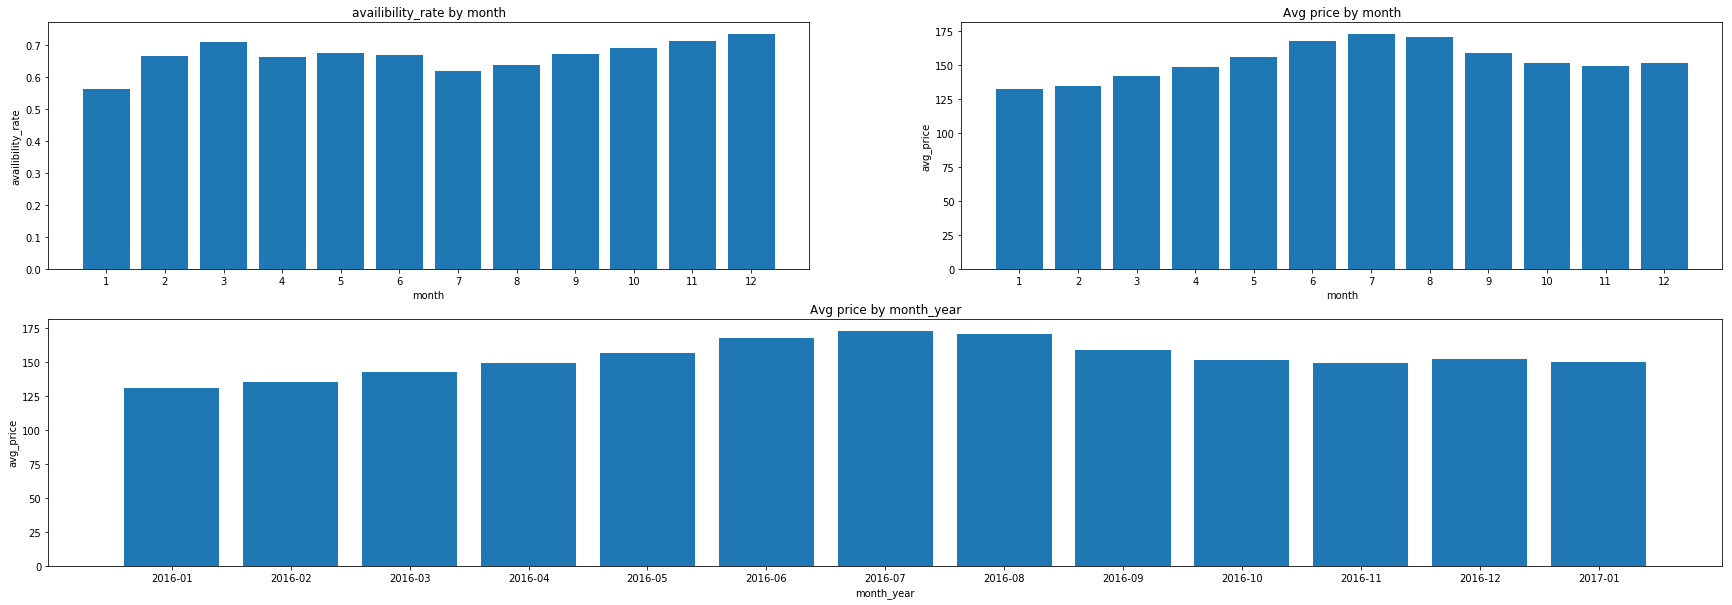

In [108]:
pivot_1 = pd.pivot_table(calendar[calendar['available'] == 't'], index='month', values=['price'], aggfunc={ 'price':np.mean})
pivot_1['month'] = pivot_1.index

pivot_2 = pd.pivot_table(calendar[calendar['available'] == 't'], index='month_year', values=['price'], aggfunc={'price':np.mean})
pivot_2['month_year'] = pivot_2.index
pivot_2['month_year'] = [str(x) for x in pivot_2['month_year']]

pivot_3 = pd.pivot_table(calendar, index='month', values=['listing_id'], columns=['available'], aggfunc={'listing_id': 'count'})
pivot_3['month'] = pivot_3.index
pivot_3['available_t'] = pivot_3.iloc[:,1]
pivot_3['available_f'] = pivot_3.iloc[:,0]

pivot_3['availibility_rate'] = pivot_3['available_t']/(pivot_3['available_t']+pivot_3['available_f'])
pivot_3 = pivot_3[['month','availibility_rate']].reset_index(drop=True)
pivot_3

plt.figure(figsize=(30, 10))
g = plt.GridSpec(2, 2) #Grid


plt.subplot(g[0,0])
plt.bar(pivot_3['month'], pivot_3['availibility_rate'])
plt.xlabel('month')
plt.xticks(pivot_3['month'])
plt.ylabel('availibility_rate')
plt.title('availibility_rate by month')


plt.subplot(g[0,1])
plt.bar(pivot_1['month'], pivot_1['price'])
plt.xlabel('month')
plt.xticks(pivot_1['month'])
plt.ylabel('avg_price')
plt.title('Avg price by month')

plt.subplot(g[1,:])
plt.bar(pivot_2['month_year'], pivot_2['price'])
plt.xlabel('month_year')
plt.xticks(pivot_2['month_year'])
plt.ylabel('avg_price')
plt.title('Avg price by month_year')

plt.show()

The busiest time (average) of Airbnb visitors at Seattle is on Mar, Nov, and Dec. It is around 70%. Overall, It may be effected by the number of holidays or the celebration event in each season.
Marketing may need to create the attraction promotion during the high season to increase the customer rate.

2. Where is the busiest homestay in Seattle?

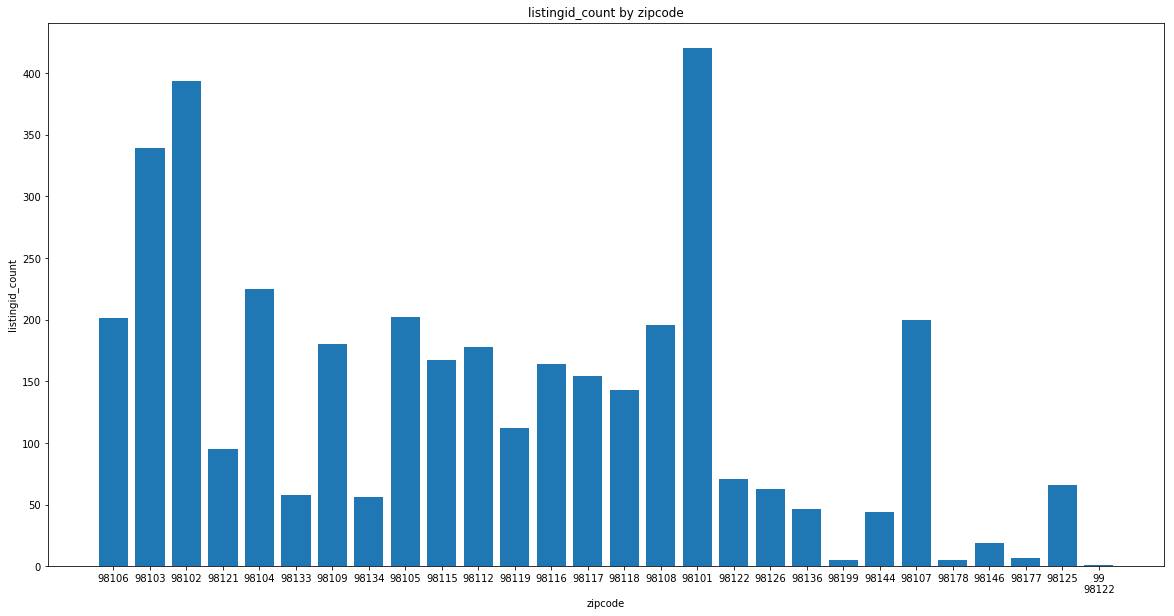

In [109]:
zip = listings['zipcode'].value_counts()
zip = zip.to_frame().reset_index()
zip = zip.rename({'index':'zipcode', 'zipcode':'listingid_count'}, axis=1)
zip['zipcode'].astype('str')


plt.figure(figsize = (20,10))
plt.bar(zip['zipcode'], zip['listingid_count'])
plt.xlabel('zipcode')
plt.xticks(zip['zipcode'])
plt.ylabel('listingid_count')
plt.title('listingid_count by zipcode')
plt.show()

Top areas of Airbnb properties in Seattle are:

In [119]:
zip.head()

,zipcode,listingid_count
0,98122,420
1,98103,394
2,98102,339
3,98105,225
4,98109,202


Airbnb visitor usually choose to stay at the homestay with zipcode 98122, 98103, 98102, 98105, 98109.
Team might need to review the customer feedback or ask the owner about their management and services.

3. What impact do relate with the price of Airbnb's homestay at Seattle?

In [111]:
q3.head()

,price,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,cleaning_fee,reviews_per_month,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict
0,85.0,4,1.0,1.0,1.0,788.481832,2613.33619,61.710904,4.070000,0,1,0
1,150.0,4,1.0,1.0,1.0,1000.000000,3000.00000,40.000000,1.480000,0,0,1
2,975.0,11,4.5,5.0,7.0,788.481832,2613.33619,300.000000,1.150000,0,0,1
3,100.0,3,1.0,0.0,2.0,650.000000,2300.00000,61.710904,2.078919,0,0,0
4,450.0,6,2.0,3.0,3.0,788.481832,2613.33619,125.000000,0.890000,0,0,1


In [116]:
print('Correlation among numeric variables: \n')

plt.figure(figsize=(14,10))
corr = q3.corr()
print(corr['price'], '\n')

Correlation among numeric variables: 

price                           1.000000
accommodates                    0.652218
bathrooms                       0.516017
bedrooms                        0.627596
beds                            0.589306
weekly_price                    0.626361
monthly_price                   0.495664
cleaning_fee                    0.583274
reviews_per_month              -0.199620
instant_bookable_t             -0.031712
cancellation_policy_moderate   -0.102123
cancellation_policy_strict      0.226632
Name: price, dtype: float64 



In [ ]:
Accomodation type, no. of bedrooms, weekly price are the top-related with the price of Airbnb homestay. No. of bathroom, beds, monthly price, cleaning fee are the second-related with the price of Airbnb homestay.
Marketing may arrange the promotion which relate to the top association with the Airbnb's price.

In [ ]:
Modeling

In [113]:
y = q3['price']
X = q3.drop(columns = ['price'], inplace=False)
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
accommodates                    3818 non-null int64
bathrooms                       3818 non-null float64
bedrooms                        3818 non-null float64
beds                            3818 non-null float64
weekly_price                    3818 non-null float64
monthly_price                   3818 non-null float64
cleaning_fee                    3818 non-null float64
reviews_per_month               3818 non-null float64
instant_bookable_t              3818 non-null uint8
cancellation_policy_moderate    3818 non-null uint8
cancellation_policy_strict      3818 non-null uint8
dtypes: float64(7), int64(1), uint8(3)
memory usage: 249.9 KB


test_score:  0.610692482621
train_score:  0.612707682664
The model is not overfitted.
The r-squared score for the model is 0.6106924826212419 on 1146 values. 

Rank features by their impact on the price: 
                          feature       coef   abs_coef
1                      bathrooms  16.965889  16.965889
0                   accommodates  11.605794  11.605794
2                       bedrooms  10.722350  10.722350
7              reviews_per_month  -3.330174   3.330174
3                           beds  -2.768310   2.768310
9   cancellation_policy_moderate  -2.033063   2.033063
8             instant_bookable_t   2.009741   2.009741
10    cancellation_policy_strict   0.520683   0.520683
6                   cleaning_fee   0.393119   0.393119
4                   weekly_price   0.082866   0.082866
5                  monthly_price   0.001238   0.001238 



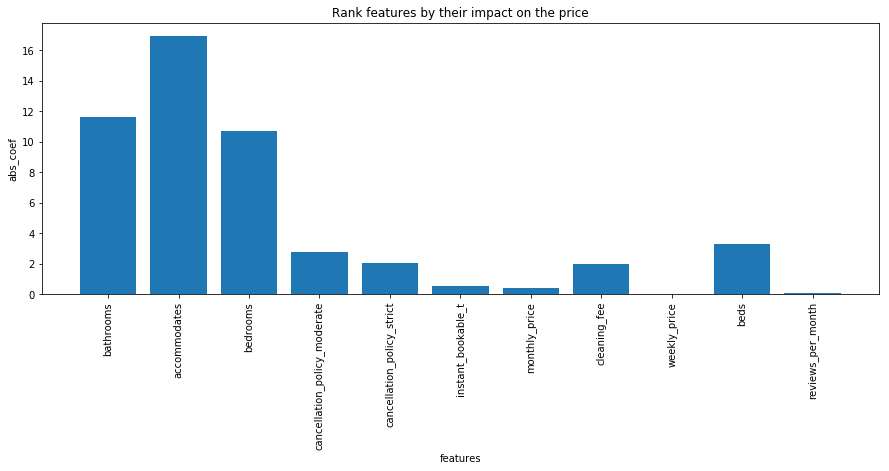

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)
y_test_predict = lm_model.predict(X_test)
y_train_predict = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print('test_score: ',test_score)
print('train_score: ', train_score)
if abs(test_score/train_score) > 0.8:
    print('The model is not overfitted.')
else:
    print('Need to improve the model.')
print('The r-squared score for the model is {} on {} values.'.format(test_score, len(y_test)),'\n')


coef_df = pd.DataFrame()
coef_df['feature'] = X_train.columns
coef_df['coef'] = lm_model.coef_
coef_df['abs_coef'] = np.abs(lm_model.coef_)
coef_df = coef_df.sort_values(by=['abs_coef'], ascending=False)
print('Rank features by their impact on the price: \n', coef_df, '\n')

plt.figure(figsize = (15,5))
plt.bar(coef_df['feature'], coef_df['abs_coef'])
plt.xlabel('features')
plt.xticks(coef_df['feature'], rotation = 90)
plt.ylabel('abs_coef')
plt.title('Rank features by their impact on the price')
plt.show()

In conclusion, mostly 70% of Airbnb users visit Seattle on Mar, Nov, Dec. They usually stay at 98122, 98103, 98102, 98105, 98109. Feature or numbers of bathroom and bedroom effect the budget impact for customer. Team should try to review the feedback from the crowdest area and implement into the marketing straegy especially about bathroom/bedroom features. The campagin may arrange during Mar, Nov, Dec.